In [1]:
%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set(rc={'figure.figsize':(12,8)})
# sns.set_style('whitegrid')
# sns.set_palette('Set2')

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

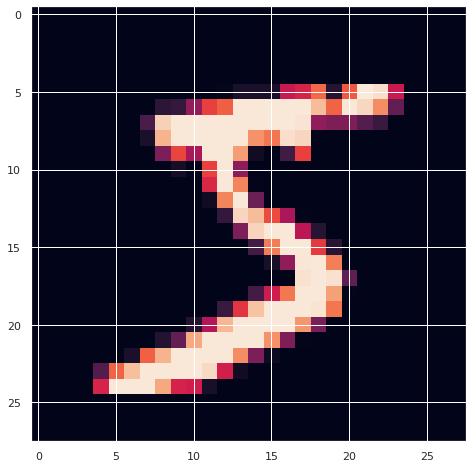

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
only_ones = X_train[y_train == 1]

In [9]:
only_ones.shape

(6742, 28, 28)

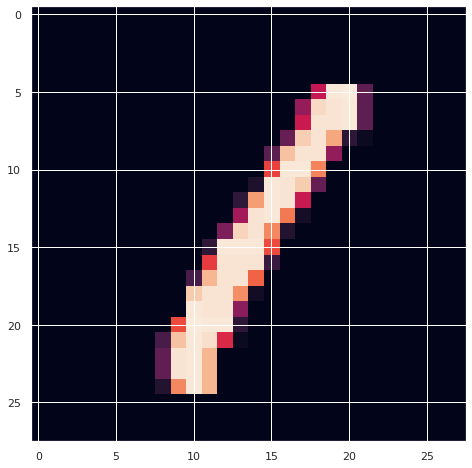

In [10]:
plt.imshow(only_ones[0])

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28,28)))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
# Final output layer
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss = 'binary_crossentropy', optimizer='adam')

In [13]:
codings_size = 100
# 100 --> 150 --> 784 (28*28)
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape((28,28)))

In [14]:
GAN = Sequential([generator, discriminator])

In [15]:
discriminator.trainable = False

In [16]:
GAN.compile(loss = 'binary_crossentropy', optimizer='adam')

In [17]:
batch_size = 32

In [18]:
# my_data = X_train
my_data = only_ones

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [20]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [21]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [22]:
epochs = 5

In [23]:
GAN

In [24]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch +1}")
    i = 0
    
    # For every batch on dataset
    for X_batch in dataset:
        
        i += 1
        if i%100 == 0:
            print(f"\t Currently on batch under {i} of {len(my_data)//batch_size}")
        
        # DISCRIMINATOR TRAINING PHASE
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        # TRAIN GENERATOR
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)    
        

Currently on Epoch 1
	 Currently on batch under 100 of 210
	 Currently on batch under 200 of 210
Currently on Epoch 2
	 Currently on batch under 100 of 210
	 Currently on batch under 200 of 210
Currently on Epoch 3
	 Currently on batch under 100 of 210
	 Currently on batch under 200 of 210
Currently on Epoch 4
	 Currently on batch under 100 of 210
	 Currently on batch under 200 of 210
Currently on Epoch 5
	 Currently on batch under 100 of 210
	 Currently on batch under 200 of 210


In [25]:
noise = tf.random.normal(shape=[10, codings_size])

In [26]:
noise.shape

TensorShape([10, 100])

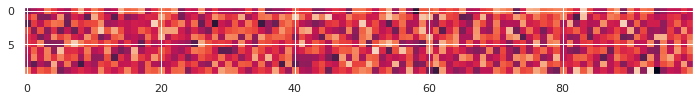

In [27]:
plt.imshow(noise)

In [28]:
images = generator(noise)

In [29]:
images.shape

TensorShape([10, 28, 28])

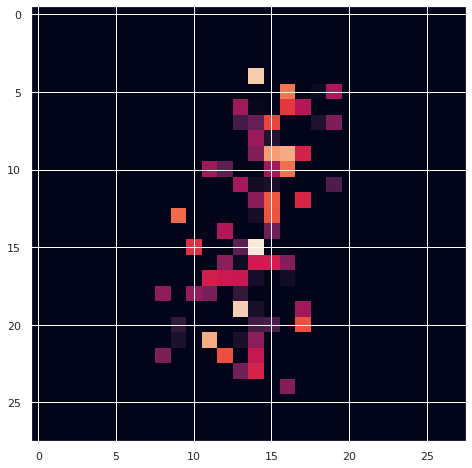

In [30]:
plt.imshow(images[2]);